<a href="https://colab.research.google.com/github/parkmina365/OpenCV/blob/main/OpenCV_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 6장. 임계점 처리하기

### 이미지의 기본 이진화
- cv2.threshold(image, thresh, max_value, type): 임계점을 기준으로 흑/백으로 분류하는 함수
  - image: 처리할 Gray Scale 이미지
  - thresh: 임계값(전체 픽셀 적용)
  - max_value: 임계값을 넘었을 때 적용할 값
  - type: 임계값 처리 방식
    - THRESH_BINARY: 임계 값보다 크면 max_value, 작으면 0
    - THRESH_BINARY_INV: 임계 값보다 작으면 max_value, 크면 0
    - THRESH_TRUNC: 임계 값보다 크면 임계 값, 작으면 그대로
    - THRESH_TOZERO: 임계 값보다 크면 그대로, 작으면 0
    - THRESH_TOZERO_INV: 임계 값보다 크면 0, 작으면 그대로

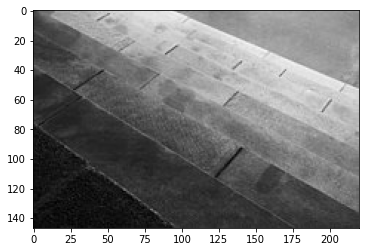

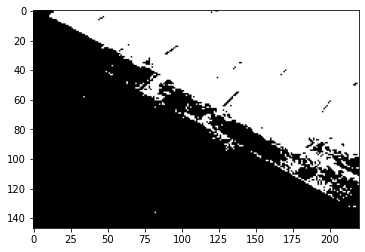

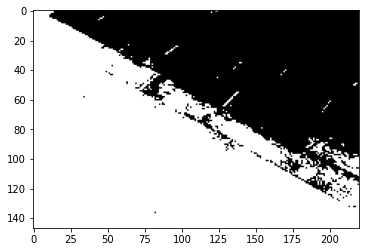

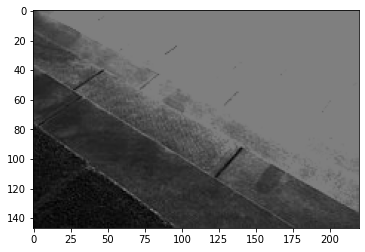

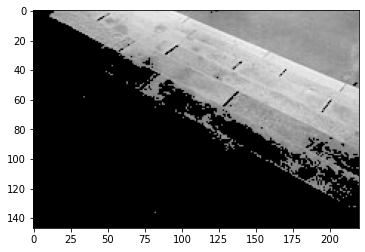

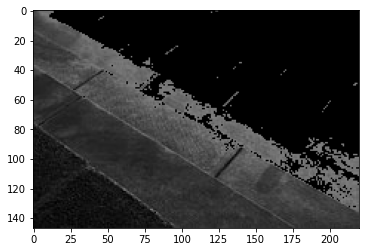

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('gray_image.jpg')
plt.imshow(image)
plt.show()

images = []

ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
ret, thres2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
ret, thres3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
ret, thres4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
ret, thres5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
images.append(thres1)
images.append(thres2)
images.append(thres3)
images.append(thres4)
images.append(thres5)

for i in images:
  plt.imshow(i)
  plt.show()

### 이미지의 적응 임계점 처리
- 하나의 흑백 이미지에 다수의 조명 상태가 존재하는 경우의 임계점 처리 방법
- 전체 픽셀을 기준으로 임계값을 적용하지 않고. 특정 영역마다 다른 임계값 적용
- cv2.adaptiveThreshold(image, max_value, adaptive_method, type, block_size, C):
  - max_value: 임계 값을 넘었을 때 적용할 값
  - adaptive_method: 임계 값을 결정하는 계산 방법
    - ADAPTIVE_THRESH_MEAN_C: 주변영역의 평균값으로 결정
    - ADAPTIVE_THRESH_GAUSSIAN_C
 - type: 임계점을 처리하는 방식
 - block_size: 임계 값을 적용할 영역의 크기
 - C: 평균이나 가중 평균에서 차감할 값

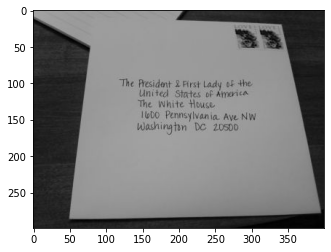

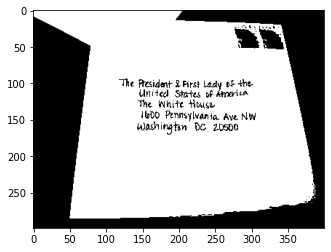

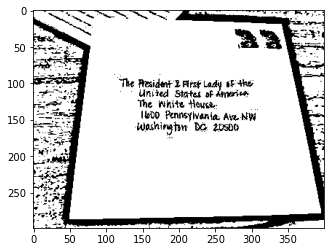

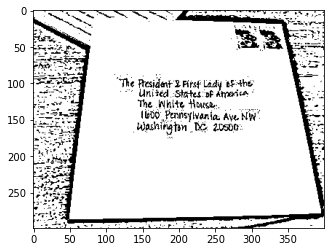

In [ ]:
image = cv2.imread('hand_writing_image.jpg', cv2.IMREAD_GRAYSCALE)

ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
thres2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3)
thres3 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 3)

for i in [image, thres1, thres2, thres3]:
  plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
  plt.show()

## 7장. Contours

### Contours(외곽) 찾기
이미지 안에 포함된 다양한 요소들의 외곽을 찾아 구분함. 입력 이미지는 Gray Scale Threshold 전처리 과정이 필요함

- cv2.findContours(image, mode, method): 이미지에서 Contour들을 찾는 함수
  - mode: Contour들을 찾는 방법
    - 1) RETR_EXTERNAL: 바깥쪽 Line만 찾기
    - 2) RETR_LIST: 모든 Line을 찾지만, Hierarchy 구성 X
    - 3) RETR_TREE: 모든 Line을 찾으며, 모든 Hierarchy 구성 O
  - method: Contour들을 찾는 근사치 방법
    - 1) CHAIN_APPROX_NONE: 모든 Contour 포인트 저장
    - 2) CHAIN_APPROX_SIMPLE: Contour Line을 그릴 수 있는 포인트만 저장


### Coutours 그리기
- cv2.drawContours(image, contours, contour_index, color, thickness): Contour들을 그리는 함수
  - contour_index: 그리고자 하는 Contours Line (전체: -1)

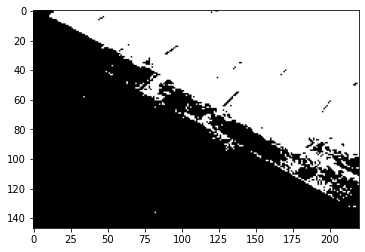

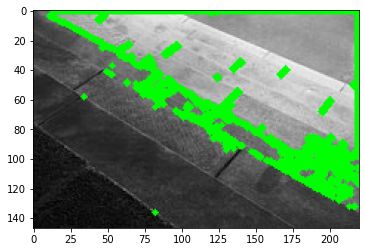

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('gray_image.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 127, 255, 0)
# ret, thresh = cv2.threshold(image_gray, 127, 255, 0)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (0, 255, 0), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## 8장. Contours 처리

### Contour의 사각형 외곽 찾기
- cv2.boundingRect(contour): Contour를 포함하는 사각형을 그림
- 반환: 사각형의 X, Y 좌표, 너비, 높이

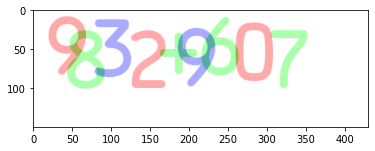

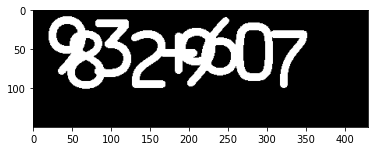

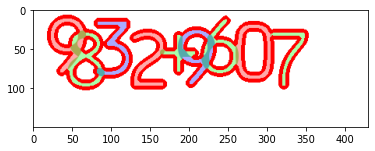

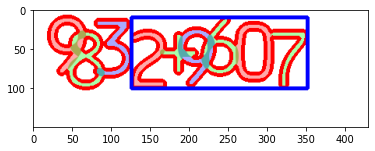

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('digit_image.png')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# threshhold
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

# 컨투어 그리기
contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# 첫번째 컨투어 객체 외곽에 직사각형 박스 그리기
contour = contours[0]
x, y, w, h = cv2.boundingRect(contour)
image = cv2.rectangle(image, (x,y), (x+w, y+h), (255,0,0), 3)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### Coutour의 다각형 외곽 찾기
- cv2.convexHull(contour): Convex Hull 알고리즘으로 외곽을 구하는 함수. 대략적인 형태의 Contour 외곽을 빠르게 구할 수 있음. 다각형 형태
- 반환: 단일 Contour

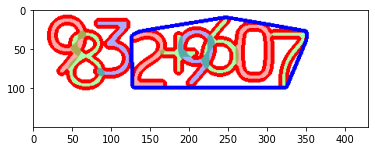

In [ ]:
image = cv2.imread('digit_image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

# 첫번째 컨투어 객체 외곽에 다각형 그리기
contour = contours[0]
hull = cv2.convexHull(contour)
image = cv2.drawContours(image, [hull], -1, (255,0,0),4)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### Contour의 유사 다각형 구하기
- cv2.approxPolyDP(curve, epsilon, closed): 근사치 Contour를 구함
  - curve: Contour
  - epsilon: 최대 거리 (클수록 Point 개수 감소)
  - closed: 폐곡선 여부

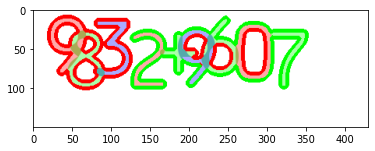

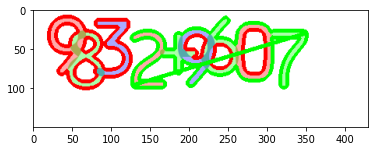

In [ ]:
image = cv2.imread('digit_image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

# 첫번째 컨투어 객체 외곽에 유사 다각형 그리기(epsilon 상수곱이 작은 경우)
contour = contours[0]
epsilon = 0.0001*cv2.arcLength(contour, True)  
approx = cv2.approxPolyDP(contour, epsilon, True)
image = cv2.drawContours(image, [approx], -1, (0,255,0),4)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# 첫번째 컨투어 객체 외곽에 유사 다각형 그리기(epsilon 상수곱이 큰 경우)
contour = contours[0]
epsilon = 0.1*cv2.arcLength(contour, True)  
approx = cv2.approxPolyDP(contour, epsilon, True)
image = cv2.drawContours(image, [approx], -1, (0,255,0),4)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### Contour의 면적, 둘레, 특징
- cv2.contourArea(contour): Contour의 면적 구함
- cv2.arcLength(contour): Contour의 둘레 구함
- cv2.moments(contour): Contour의 특징 추출

Contour 면적: 9637.5
Contour 길이: 1112.1046812534332
Contour 특징: {'m00': 9637.5, 'm10': 2328654.1666666665, 'm01': 525860.6666666666, 'm20': 592439950.25, 'm11': 125395340.54166666, 'm02': 32616659.75, 'm30': 157199366984.05002, 'm21': 31597487112.5, 'm12': 7677332730.433333, 'm03': 2223038890.5, 'mu20': 29780523.227014065, 'mu11': -1665373.5978347063, 'mu02': 3923591.96819859, 'mu30': -339915780.7390442, 'mu21': 76375946.41720533, 'mu12': -21905836.49518633, 'mu03': 15169233.760740757, 'nu20': 0.3206295471760697, 'nu11': -0.01793010748946005, 'nu02': 0.04224302932750429, 'nu30': -0.03727866486560947, 'nu21': 0.008376172780476334, 'nu12': -0.0024024196097321344, 'nu03': 0.001663614382378067}


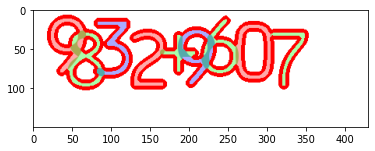

In [ ]:
image = cv2.imread('digit_image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (0,0,255), 4)

# 첫번째 컨투어 객체의 정보들
contour = contours[0]
print(f'Contour 면적: {cv2.contourArea(contour)}')
print(f'Contour 길이: {cv2.arcLength(contour, True)}')
print(f'Contour 특징: {cv2.moments(contour)}')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## 9장. Filtering

### 커널 생성하여 필터 적용
- 이미지에 커널을 적용하여 이미지를 흐리게(Blurring = Smoothing) 처리할 수 있음
- 이미지를 흐리게 만들면 노이즈 및 손상을 줄일 수 있음
- 특정한 이미지에서 커널(Kernel)을 적용해 컨볼루션 계산하여 필터링을 수행할 수 있음
  - 컨볼루션 연산: 동일한 위치에서 커널(일종의 Window) 각각의 값들을 곱해주는 것
- cv2.filter2D(image, -1, kernel)

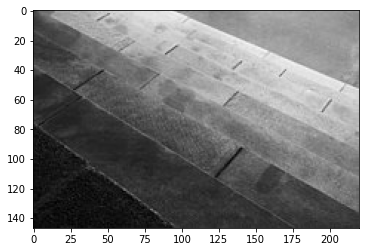

[[0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]]


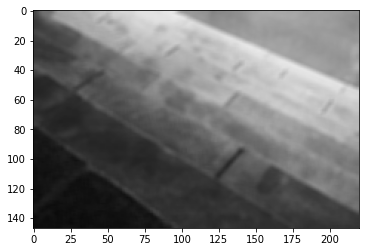

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('gray_image.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# 임의로 커널 만들기
size = 4
kernel = np.ones((size, size), np.float32) / (size**2)  # 커널의 전체 합은 1이어야
print(kernel)

dst = cv2.filter2D(image, -1, kernel)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

[[0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625 0.015625]]


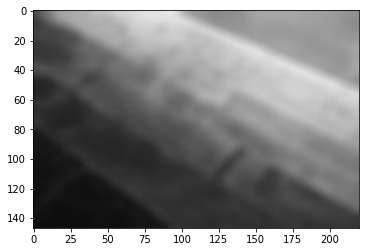

In [ ]:
# 임의로 커널 만들기(size 확대)
size = 8
kernel = np.ones((size, size), np.float32) / (size**2)
print(kernel)

dst = cv2.filter2D(image, -1, kernel)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### Basic Kernel
- 커널이 모두 같은 가중치를 가짐
- cv2.blur(image, kernel)


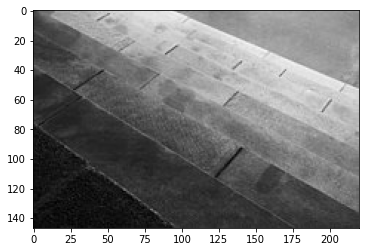

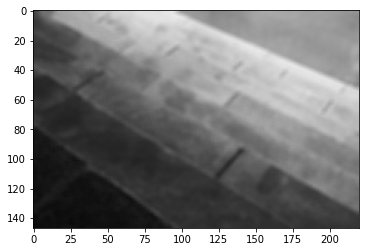

In [ ]:
image = cv2.imread('gray_image.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

dst = cv2.blur(image, (4,4))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show() # 임의로 만든 커널과 같은 결과

### Gaussian Kernel
- 커널이 정규분포 형태를 띔. 중간일수록 값이 크고 멀어질수록 값이 작음
- cv2.GaussianBlur(image, kernel, 0)
  - kernel 사이즈가 홀수여야함

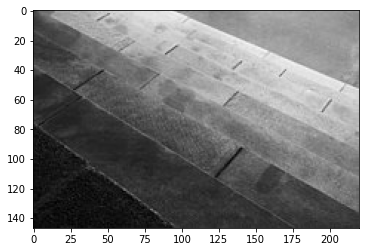

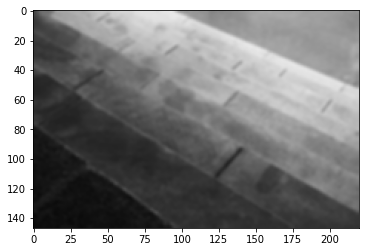

In [ ]:
image = cv2.imread('gray_image.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

dst = cv2.GaussianBlur(image, (5,5), 0)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()